In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve 

colors = ['#FF5851', '#3d9dfc', '#d852fa', '#494a49', '#212121' , '#ffffff', '#727372', '#03fc39']

#from sklearn.metrics import plot_precision_recall_curve
sns.set()
%matplotlib inline

In [2]:
raw_data = pd.read_csv('D:\Jupyter Notebook\creditcard.csv.zip')
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
raw_data.shape

(284807, 31)

In [5]:
raw_data.isnull().sum() #Checking for any missing data.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
counts = pd.value_counts(raw_data['Class'])
counts

Class
0    284315
1       492
Name: count, dtype: int64

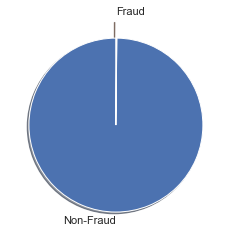

In [7]:
plt.pie(counts,labels=['Non-Fraud','Fraud'],startangle=90,explode=[0,0.2],shadow=True)
plt.show()

### Since, we have to predict whether the given person will commit fraud or not. This is logistics regression with output being 'yes' or 'no'. But before that we split the data into train and test.

In [8]:
#Defining our inputs and targets
y = raw_data['Class']
x = raw_data.drop(['Class'],axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


### Splitting for train and test.

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=365) #keeping split ratio default.
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212033,138685.0,-3.597844,0.401002,-1.174747,-0.334903,-1.158557,-1.010330,-0.127227,1.259660,0.077066,...,-1.228783,-0.065598,-0.301377,-0.055806,0.022006,0.085096,-0.123289,-0.865805,-0.206325,110.00
60334,49280.0,-0.302858,0.943849,1.501295,0.550563,-0.049661,-0.753269,0.538659,0.001857,-0.557118,...,-0.018355,-0.097799,-0.287542,0.163010,0.555100,-0.894039,0.086245,0.149183,0.176371,4.49
81241,58844.0,-0.392391,1.400922,0.525298,0.669824,0.736183,-0.943648,0.921951,-0.186218,-0.575444,...,-0.045128,-0.003375,-0.004820,-0.258854,-0.112366,0.307780,-0.356488,-0.066394,0.050733,1.00
283676,171781.0,-1.821743,1.831544,-3.087880,-0.980414,0.723686,5.054134,-3.740729,-2.841360,0.103298,...,0.708846,-2.127386,1.765853,0.575069,0.651373,-0.772113,0.577636,-0.575135,-0.109616,64.95
140563,83788.0,-0.246101,0.954672,1.188353,0.702991,0.358013,-0.297284,0.634850,0.026906,-0.829346,...,-0.007268,0.184699,0.524322,-0.215101,0.009043,-0.258806,-0.330717,0.166456,0.150249,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14597,25814.0,-0.887227,0.011038,1.298257,1.394512,-0.545775,0.685686,1.586727,-0.008345,-0.377340,...,0.781884,0.139268,0.342006,0.511578,0.174370,-0.089179,-0.287223,0.155162,-0.007147,292.63
172460,121108.0,2.167804,-1.699161,-0.802767,-1.101491,-1.616745,-0.726138,-1.063872,-0.153942,-0.527293,...,-0.463580,-0.509745,-0.875337,0.284808,-0.007315,-0.227052,-0.325926,0.006696,-0.046911,64.17
275291,166463.0,-2.516563,2.753786,-1.717382,-1.575139,0.488811,0.037750,0.428446,0.610236,1.433184,...,1.226602,-0.543858,-0.912234,0.126673,-0.387968,0.201019,0.199354,1.142474,0.691987,8.93
4897,4431.0,1.159266,-0.068184,0.522080,1.340043,0.178743,1.401810,-0.632770,0.350461,2.064474,...,-0.208210,-0.273400,-0.235403,-0.236655,-1.368112,0.718796,-0.229859,0.036269,-0.007499,15.00


In [10]:
y_train

212033    0
60334     0
81241     0
283676    0
140563    0
         ..
14597     0
172460    0
275291    0
4897      0
212562    0
Name: Class, Length: 213605, dtype: int64

In [11]:
raw_data = raw_data.drop(['Time'],axis=1)

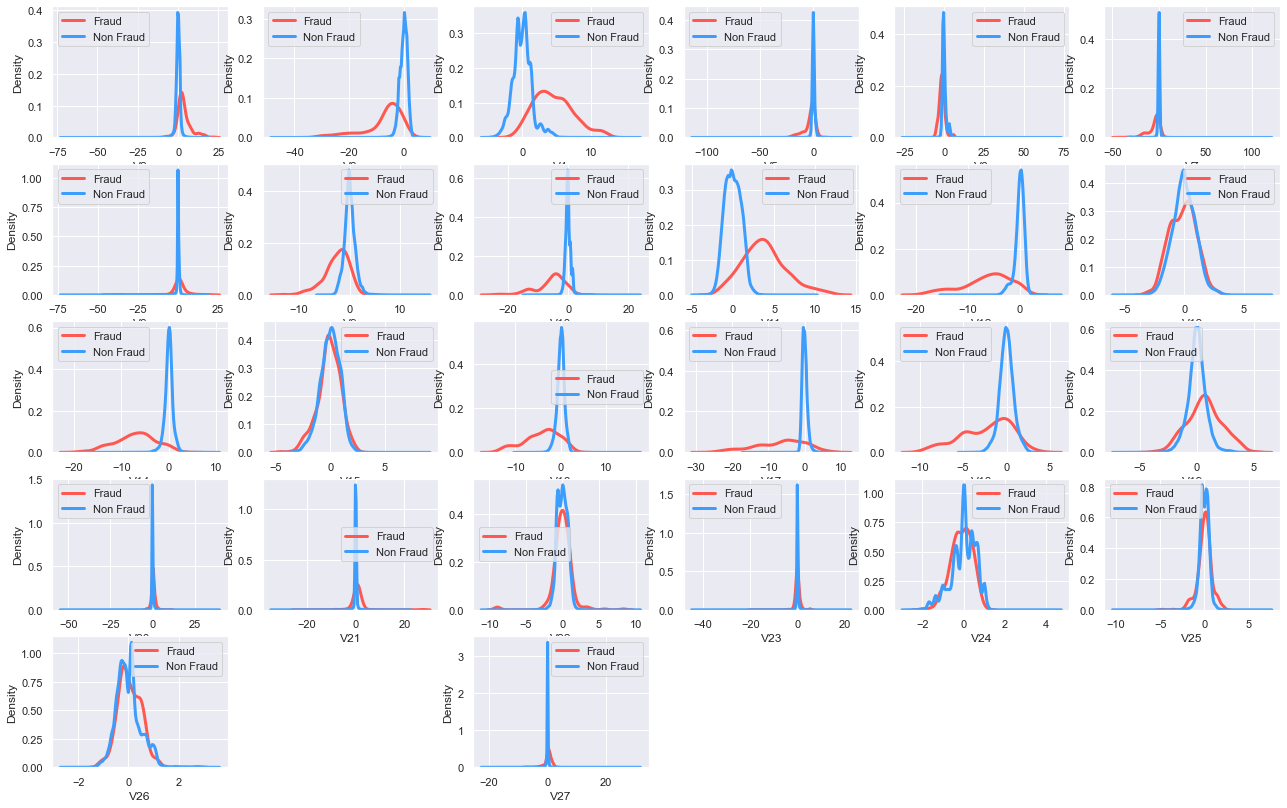

In [12]:
fig = plt.figure(figsize=(22, 14))
fig.tight_layout(pad=3.0)

for idx, i in enumerate(raw_data.columns[1:-3]):
    # for centering last subplots
    if idx+1 >=26:
        idx += 1
        
    plt.subplot(5, 6, idx+1)
    sns.kdeplot(x=raw_data[raw_data['Class'] == 1][i], linewidth=3, color=colors[0])
    sns.kdeplot(x=raw_data[raw_data['Class'] == 0][i], linewidth=3, color=colors[1])
    
    plt.legend(labels=['Fraud', 'Non Fraud'])

#### So from the above graphs we can see that the red curve depicts the distribution plot for each input feature given that the fraud is taking place. For some of the plots like V2, there are outliers to the left and also the density is very less compared to the non-fraud one. So this will particular factor will play a decent roll in determining the fraud or not-fraud situation. Similarly, we have V3,V8,V9 and so on.

### Checking for p-values 

In [13]:
x_new = sm.add_constant(x_train)
sm_reg = sm.Logit(y_train,x_new).fit()#OLS stands for Ordinary Least Square
sm_reg.summary()

Optimization terminated successfully.
         Current function value: 0.003876
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               213605
Model:                          Logit   Df Residuals:                   213574
Method:                           MLE   Df Model:                           30
Date:                Thu, 13 Jul 2023   Pseudo R-squ.:                  0.6893
Time:                        10:48:24   Log-Likelihood:                -827.95
converged:                       True   LL-Null:                       -2665.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3815      0.291    -28.850      0.000      -8.951      -7.812
Time        -5.24e-06   2.71e-06     -1.937      0.053   -1.05e-05     6.3e-08
V1             0.1097      0.049      2.238      0.025       0.014       0.206
V2             0.0025      0.063      0.040      0.968      -0.122       0.127
V3            -0.0447      0.064     -0.696      0.486      -0.170       0.081
V4             0.7221      0.084      8.546      0.000       0.556       0.888
V5             0.0791      0.081      0.974      0.330      -0.080       0.238
V6            -0.1648      0.095     -1.729      0.084      -0.352       0.022
V7            -0.0501      0.076     -0.662      0.508      -0.198       0.098
V8            -0.1754      0.036     -4.827      0.000      -0.247      -0.104
V9            -0.4727      0.131     -3.608      0.000      -0.729      -0.216
V10           -0.7634      0.106     -7.223      0.000      -0.971      -0.556
V11           -0.1772      0.097     -1.834      0.067      -0.366       0.012
V12            0.2819      0.112      2.506      0.012       0.061       0.502
V13           -0.4482      0.101     -4.429      0.000      -0.647      -0.250
V14           -0.6297      0.076     -8.239      0.000      -0.780      -0.480
V15           -0.1042      0.101     -1.027      0.304      -0.303       0.095
V16           -0.1484      0.145     -1.020      0.308      -0.434       0.137
V17           -0.0361      0.082     -0.442      0.659      -0.196       0.124
V18           -0.1030      0.150     -0.685      0.493      -0.398       0.192
V19            0.1331      0.112      1.191      0.234      -0.086       0.352
V20           -0.4760      0.090     -5.289      0.000      -0.652      -0.300
V21            0.4012      0.071      5.675      0.000       0.263       0.540
V22            0.6635      0.154      4.299      0.000       0.361       0.966
V23           -0.1000      0.071     -1.413      0.158      -0.239       0.039
V24            0.0262      0.176      0.149      0.882      -0.319       0.371
V25           -0.0569      0.153     -0.371      0.710      -0.357       0.243
V26            0.3112      0.211      1.475      0.140      -0.102       0.725
V27           -0.8533      0.130     -6.570      0.000      -1.108      -0.599
V28           -0.3506      0.110     -3.176      0.001      -0.567      -0.134
Amount         0.0009      0.000      2.444      0.015       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### We see that V2,V24,V25 variable has a very high p-value so we will drop that feature:

In [14]:
raw_data=raw_data.drop(['V2','V24','V25'],axis=1)
raw_data.shape

(284807, 27)

### Logistic Regression: training the model with training input and training output

In [15]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
train_prediction = log_reg.predict(x_train)
train_prediction

C:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Checking the accuracy and also confusion matrix for training data.

In [16]:
training_accuracy = accuracy_score( y_train,train_prediction)
training_accuracy*100

99.88623861800988

In [17]:
train_confusion_matrix = confusion_matrix(y_train,train_prediction)
train_confusion_matrix

array([[213136,    108],
       [   135,    226]], dtype=int64)

<AxesSubplot:>

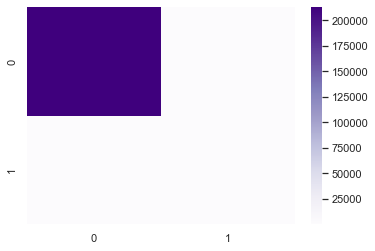

In [18]:
sns.heatmap(train_confusion_matrix,cmap='Purples')

In [19]:
precision, recall, thresholds = precision_recall_curve(y_train,train_prediction)

In [20]:
auc_precision_recall = auc(recall, precision)
auc_precision_recall*100

65.1658747713992

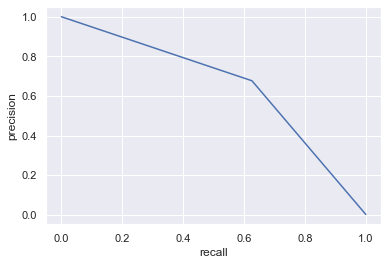

In [21]:
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

### Now testing the model

In [22]:
test_prediction = log_reg.predict(x_test)

In [23]:
testing_accuracy = accuracy_score(y_test,test_prediction)
testing_accuracy*100

99.8876436055167

In [24]:
test_confusion_matrix = confusion_matrix(y_test,test_prediction)
test_confusion_matrix

array([[71047,    24],
       [   56,    75]], dtype=int64)

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test,test_prediction)

In [26]:
auc_precision_recall = auc(recall, precision)
auc_precision_recall*100

66.54406681533031

Text(0, 0.5, 'precision')

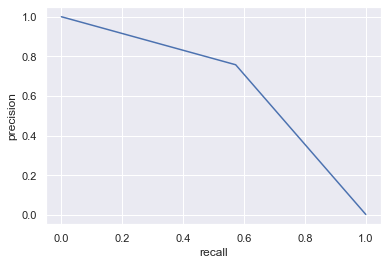

In [27]:
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')

In [28]:
cor = raw_data.corr()
cor

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V26,V27,V28,Amount,Class
V1,1.000000e+00,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,2.125498e-16,...,1.502024e-16,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V3,-1.227819e-15,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,1.576830e-15,...,3.463522e-16,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-9.215150e-16,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,3.459380e-16,...,-3.980557e-16,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,1.812612e-17,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,7.203963e-16,...,-1.450421e-16,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-6.506567e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,1.980503e-15,...,-1.865597e-16,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,-1.005191e-15,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,1.425248e-16,...,-1.881008e-16,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-2.433822e-16,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,2.487043e-16,...,-3.875186e-16,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-1.513678e-16,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,1.354680e-16,...,-1.376135e-16,-2.343720e-16,1.936953e-16,-7.071869e-16,-5.214137e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733
V10,7.388135e-17,1.156587e-15,2.232685e-16,-5.202306e-16,5.932243e-17,-7.492834e-17,-2.801370e-16,-4.642274e-16,1.000000e+00,-4.622103e-16,...,3.437633e-17,-1.331556e-15,1.177547e-15,-6.418202e-16,3.214491e-16,-3.028119e-16,-2.197977e-16,4.864782e-17,-0.101502,-0.216883
V11,2.125498e-16,1.576830e-15,3.459380e-16,7.203963e-16,1.980503e-15,1.425248e-16,2.487043e-16,1.354680e-16,-4.622103e-16,1.000000e+00,...,-7.389748e-16,-1.481299e-16,-5.658364e-16,7.772895e-16,-4.505332e-16,-1.003221e-16,-2.640281e-16,-3.792314e-16,0.000104,0.154876


### Feature Correlation plot.

<AxesSubplot:>

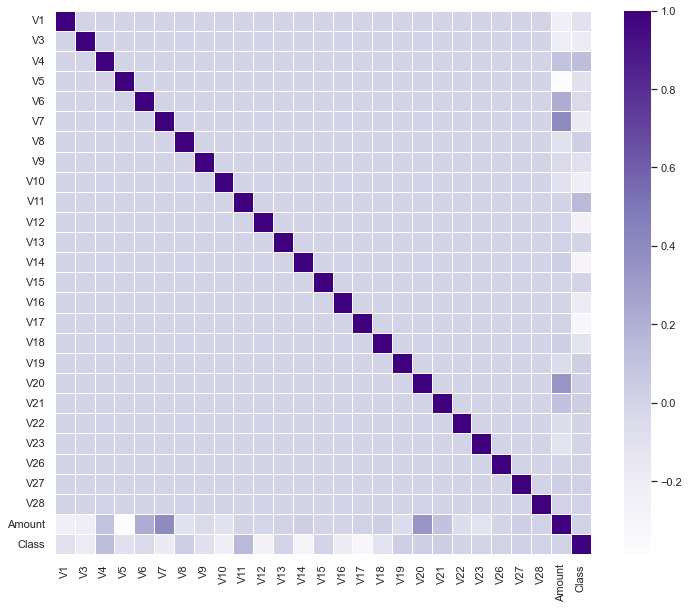

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(data=cor,cmap='Purples',linewidths=0.1)

### So finally we have a logistic regression model that we trained and tested, both having 99.88% accuracy.